In [13]:
import numpy as np, matplotlib.pyplot as plt, yfinance as yf, pandas as pd
from statsmodels.tsa.stattools import acf, pacf, adfuller
import scipy.stats as stats, seaborn as sns

## GS

In [ ]:
ticker = 'GS'
file_name= ("GS_stock_data.csv")
data = pd.read_csv(file_name, parse_dates=['Date'])

# Load and display the saved trajectory (optional)
def load_and_display_trajectory(file_name):
    try:
        # Load trajectory from file
        loaded_data = pd.read_csv(file_name, parse_dates=['Date'])

        # Plot the loaded trajectory
        plt.figure(figsize=(15, 7))
        plt.plot(loaded_data['Date'], loaded_data['Close'], label="Loaded Trajectory of Stock Price")
        plt.title(f"Loaded {ticker} Stock Price Trajectory")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.grid(True)
        plt.legend()
        plt.show()

        print("Stock data loaded and displayed successfully.")
    except FileNotFoundError:
        print(f"File {file_name} not found.")

# Example usage of loading and displaying the trajectory
file_name = f"{ticker}_stock_data.csv"
load_and_display_trajectory(file_name)

In [7]:
data.Date.min(), data.Date.max()

(Timestamp('2010-04-05 00:00:00'), Timestamp('2024-12-31 00:00:00'))

## waluty

In [142]:
# Ustawienia daty
start_date = "2010-04-05"
end_date = "2024-12-31"

# Pobierz dane dla kursu USD/PLN
currency_data = yf.download("USDEUR=X", start=start_date, end=end_date)

# Reset indeksu i przygotowanie pliku CSV
currency_data.reset_index(inplace=True)
currency_data = currency_data[['Close']]
currency_data.to_csv("USDEUR_exchange_rate.csv", index=False)

print("Exchange rate data saved as USDEUR_exchange_rate.csv")

[*********************100%***********************]  1 of 1 completed

Exchange rate data saved as USDEUR_exchange_rate.csv


In [143]:
data2 = pd.read_csv("USDEUR_exchange_rate.csv")
data2.head()

,Close
0,USDEUR=X
1,0.7413399815559387
2,0.7461599707603455
3,0.7491499781608582
4,0.7484400272369385


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


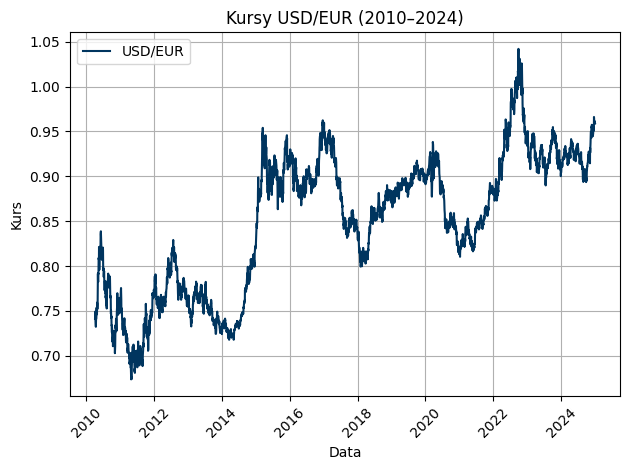

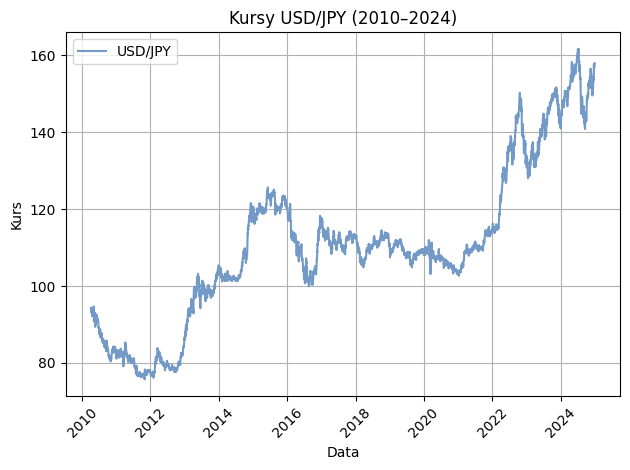

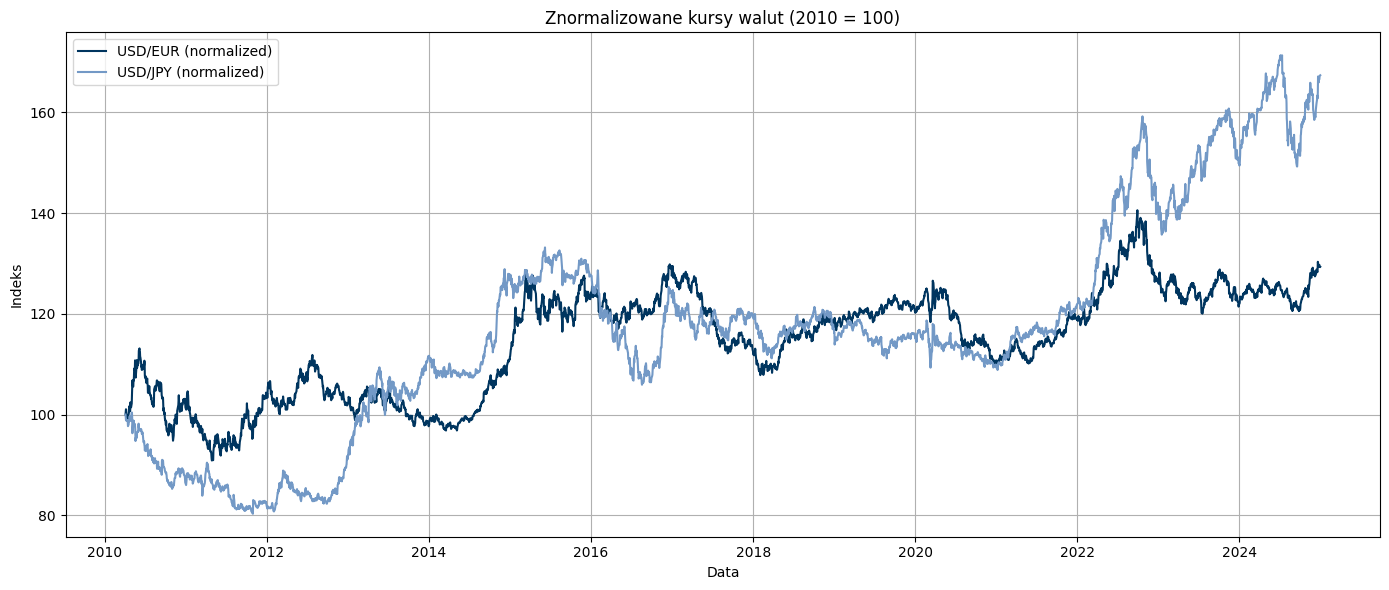

In [144]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Daty
start_date = "2010-04-05"
end_date = "2024-12-31"

# Pobranie danych kursów: USD/EUR i USD/JPY
eur = yf.download("EUR=X", start=start_date, end=end_date)[["Close"]].rename(columns={"Close": "USD_EUR"})
jpy = yf.download("JPY=X", start=start_date, end=end_date)[["Close"]].rename(columns={"Close": "USD_JPY"})

# Połączenie danych i usunięcie braków
df = pd.concat([eur, jpy], axis=1).dropna()
df = df.astype(float)
# df["Walutowy_portfel"] = (
#     0.55 * df["USD_USD"].astype(float) +
#     0.25 * df["USD_EUR"].astype(float) +
#     0.15 * df["USD_JPY"].astype(float)
# )
# # Zapisz dane do pliku CSV
# df.to_csv("currency_risk_portfolio.csv")

# Wykres kursów
plt.plot(df.index, df["USD_EUR"], label="USD/EUR", color="#00355f")
# plt.plot(df.index, df["USD_JPY"], label="USD/JPY", color="darkorange")
plt.title("Kursy USD/EUR (2010–2024)")
plt.xlabel("Data")
plt.ylabel("Kurs")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# plt.plot(df.index, df["USD_EUR"], label="USD/EUR", color="dodgerblue")
plt.plot(df.index, df["USD_JPY"], label="USD/JPY", color="#7399c6")
plt.title("Kursy USD/JPY (2010–2024)")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("Kurs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Znormalizowane kursy do porównania zmian względnych
normalized = df[["USD_EUR", "USD_JPY"]] / df[["USD_EUR", "USD_JPY"]].iloc[0] * 100
plt.figure(figsize=(14, 6))
plt.plot(normalized.index, normalized["USD_EUR"], label="USD/EUR (normalized)", color="#00355f")
plt.plot(normalized.index, normalized["USD_JPY"], label="USD/JPY (normalized)", color="#7399c6")
plt.title("Znormalizowane kursy walut (2010 = 100)")
plt.xlabel("Data")
plt.ylabel("Indeks")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# df["Walutowy_portfel"] = (
#     0.55 * df["USD_USD"].astype(float) +
#     0.25 * df["USD_EUR"].astype(float) +
#     0.15 * df["USD_JPY"].astype(float)
# )
# # Wykres portfela walutowego
# plt.figure(figsize=(14, 6))
# plt.plot(df.index, df["Walutowy_portfel"], label="Portfel walutowy firmy", color="seagreen")
# plt.title("Portfel walutowy firmy wg lokalizacji pracowników")
# plt.xlabel("Data")
# plt.ylabel("Wartość portfela (USD-index)")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


In [135]:
df

Price,USD_EUR,USD_JPY
Ticker,EUR=X,JPY=X
Date,,
2010-04-05,0.74134,94.330002
2010-04-06,0.74616,93.793999
2010-04-07,0.74915,93.308998
2010-04-08,0.74844,93.419998
2010-04-09,0.74069,93.160004
...,...,...
2024-12-24,0.96100,157.164993
2024-12-25,0.96130,157.106995


Text(0.5, 0, 'h')

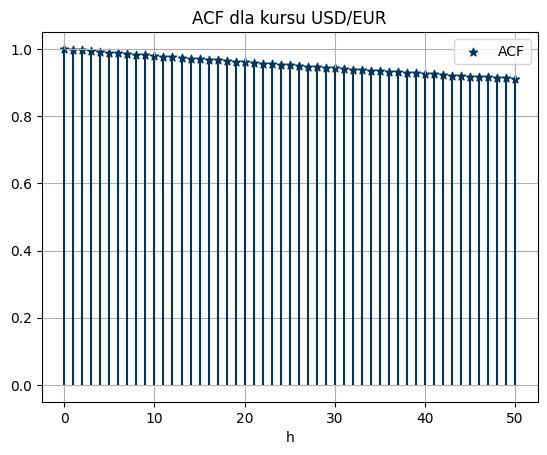

In [28]:
h = 50
acf_currency2 = acf(df["USD_EUR"], nlags=h, fft=False)
plt.vlines(x=np.arange(h+1), ymin=0, ymax=acf_currency2, color = '#00355f')
plt.scatter(np.arange(h+1), acf_currency2, marker = '*', color = '#00355f', label = 'ACF')
plt.title('ACF dla kursu USD/EUR'); plt.legend(); plt.grid()
plt.xlabel('h')

Text(0.5, 0, 'h')

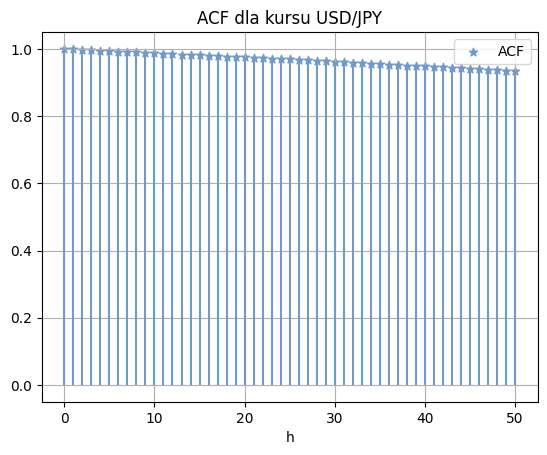

In [39]:
h = 50
acf_currency2 = acf(df["USD_JPY"], nlags=h, fft=False)
plt.vlines(x=np.arange(h+1), ymin=0, ymax=acf_currency2, color = '#7399c6')
plt.scatter(np.arange(h+1), acf_currency2, marker = '*', color = '#7399c6', label = 'ACF')
plt.title('ACF dla kursu USD/JPY'); plt.legend(); plt.grid()
plt.xlabel('h')

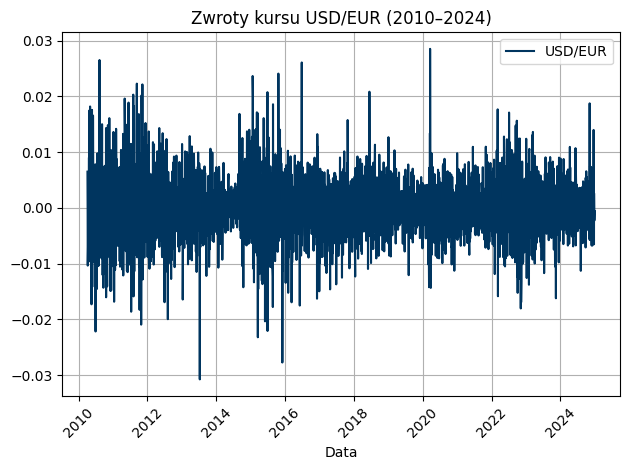

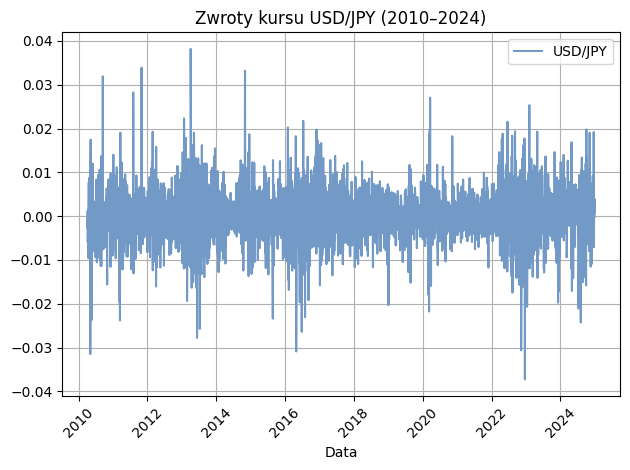

In [160]:
iid_eur = df['USD_EUR'].pct_change()
iid_jpy = df['USD_JPY'].pct_change()
# plt.figure(figsize=(7, 4))
plt.plot(df.index, iid_eur, label="USD/EUR", color="#00355f")
plt.title("Zwroty kursu USD/EUR (2010–2024)"); plt.xlabel("Data");plt.grid(True)
plt.xticks(rotation=45);plt.legend();plt.tight_layout();plt.show()

plt.plot(df.index, iid_jpy, label="USD/JPY", color="#7399c6")
plt.title("Zwroty kursu USD/JPY (2010–2024)"); plt.xlabel("Data");plt.grid(True)
plt.xticks(rotation=45);plt.legend();plt.tight_layout();plt.show()


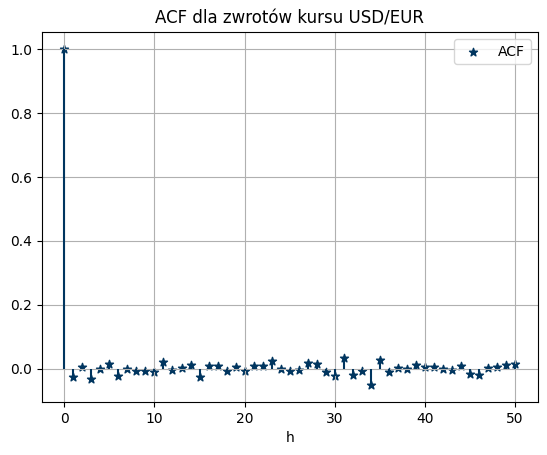

Text(0.5, 0, 'h')

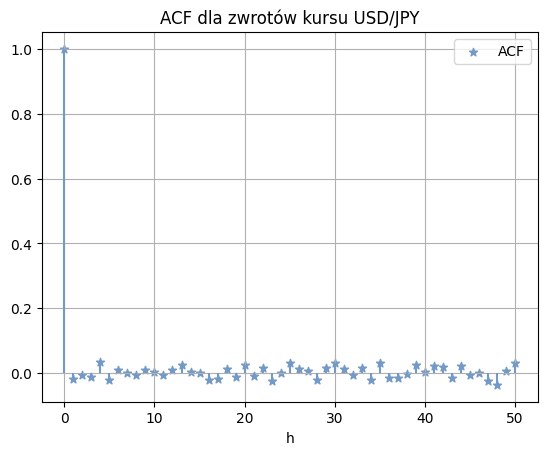

In [137]:
acf_1 = acf(iid_eur[1:], nlags=h, fft=False)
plt.vlines(x=np.arange(h+1), ymin=0, ymax=acf_1, color = '#00355f')
plt.scatter(np.arange(h+1), acf_1, marker = '*', color = '#00355f', label = 'ACF')
plt.title('ACF dla zwrotów kursu USD/EUR'); plt.legend(); plt.grid()
plt.xlabel('h'); plt.show()
kolor = ['#00355f', '#7399c6']
acf_2 = acf(iid_jpy[1:], nlags=h, fft=False)
plt.vlines(x=np.arange(h+1), ymin=0, ymax=acf_2, color = '#7399c6')
plt.scatter(np.arange(h+1), acf_2, marker = '*', color = '#7399c6', label = 'ACF')
plt.title('ACF dla zwrotów kursu USD/JPY'); plt.legend(); plt.grid()
plt.xlabel('h')

In [61]:
def adfuller_test(series, sig=0.05):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 
    stats   = round(res[0], 3) 

    if p_value <= sig:
        print(f"Statystyka testowa = {stats}, p-Value = {p_value} => Stationary. ")
    else:
        print(f"Statystyka testowa = {stats}, p-value = {p_value} => Non-stationary.")

print(adfuller_test(iid_eur.dropna()))
print(adfuller_test(iid_jpy.dropna()))

Statystyka testowa = -37.155, p-Value = 0.0 => Stationary. 
None
Statystyka testowa = -63.192, p-Value = 0.0 => Stationary. 
None


In [162]:
eur = iid_eur[1:]
jpy = iid_jpy[1:]

eur_q1 = np.quantile(eur, 0.25, interpolation="midpoint")
eur_q2 = np.median(eur)
eur_q3 = np.quantile(eur, 0.75, interpolation="midpoint")

jpy_q1 = np.quantile(jpy, 0.25, interpolation="midpoint")
jpy_q2 = np.median(jpy)
jpy_q3 = np.quantile(jpy, 0.75, interpolation="midpoint")

data_q = {
    'Kwartyl': ['Q1', 'Q2', 'Q3'],
    'EUR': [eur_q1, eur_q2, eur_q3],
    'JPY': [jpy_q1, jpy_q1, jpy_q3]
}

df = pd.DataFrame(data_q)
df

,Kwartyl,EUR,JPY
0,Q1,-0.002909,-0.002912
1,Q2,0.000000,-0.002912
2,Q3,0.003063,0.003160


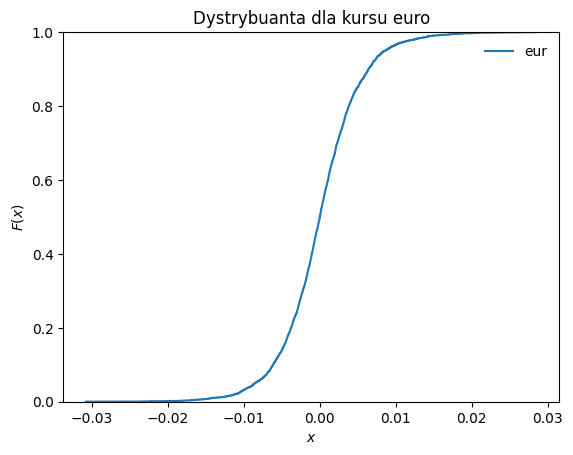

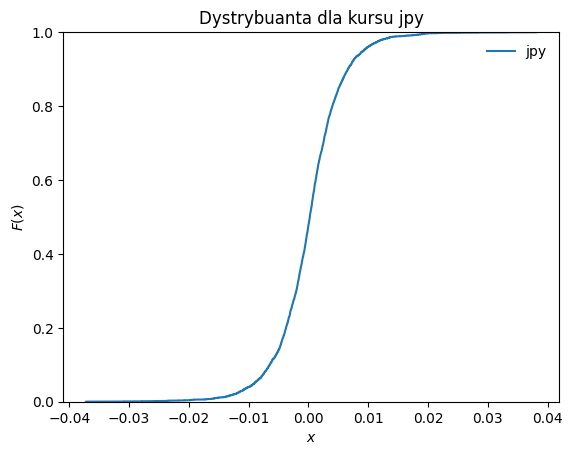

In [86]:
sns.ecdfplot(data = eur, label = 'eur')
# sns.color_palette('flare', as_cmap = True)
plt.title("Dystrybuanta dla kursu euro")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False)
plt.show()
sns.ecdfplot(data = jpy, label = 'jpy', c = 'C3')
# sns.color_palette('coolwarm', as_cmap = True)
plt.title("Dystrybuanta dla kursu jpy")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False)

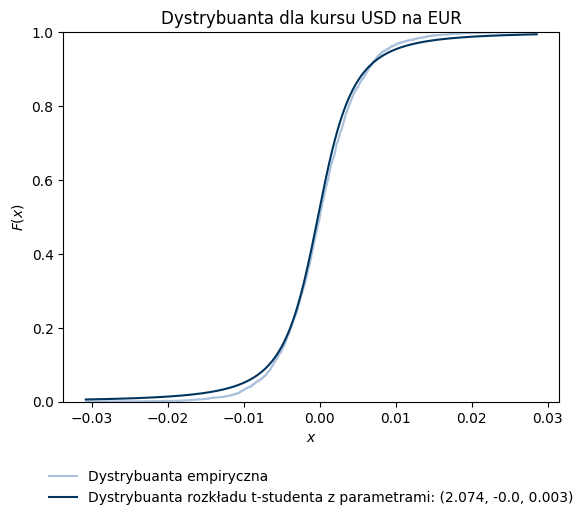

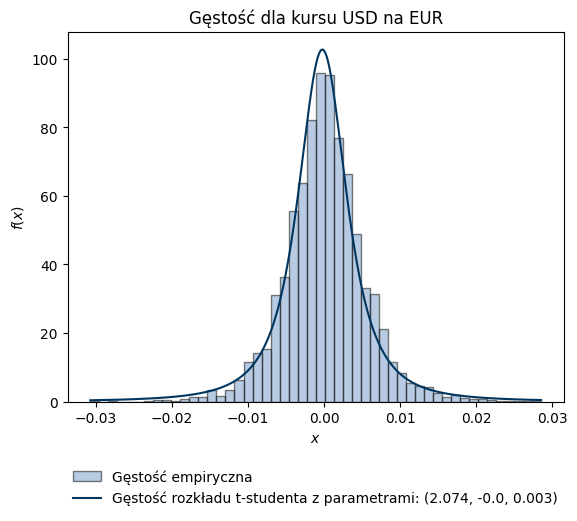

In [179]:
params_jpy = stats.t.fit(jpy)
params_eur = stats.t.fit(eur)


t_student_jpy = stats.t(*params_jpy)
t_student_eur = stats.t(*params_eur)

jpy_sample = t_student_jpy.rvs(size=len(jpy))
eur_sample = t_student_eur.rvs(size=len(eur))
sns.ecdfplot(data = eur, label = "Dystrybuanta empiryczna", color = kolor[1], alpha = 0.6)

t_eur = np.linspace(np.min(eur), np.max(eur), len(eur))
th_F = t_student_eur.cdf(t_eur)
plt.plot(t_eur, th_F, label = f"Dystrybuanta rozkładu t-studenta z parametrami: {(round(params_eur[0], 3), round(params_eur[1], 3), round(params_eur[2], 3))}",  color = kolor[0])

plt.title("Dystrybuanta dla kursu USD na EUR")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

plt.hist(eur, bins = 50, edgecolor='k', density=True, label = "Gęstość empiryczna", color = kolor[1], alpha = 0.5)

f_theo = t_student_eur.pdf(t_eur)
plt.plot(t_eur, f_theo, label = f"Gęstość rozkładu t-studenta z parametrami: {(round(params_eur[0], 3), round(params_eur[1], 3), round(params_eur[2], 3))}", color = kolor[0])
plt.title("Gęstość dla kursu USD na EUR")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

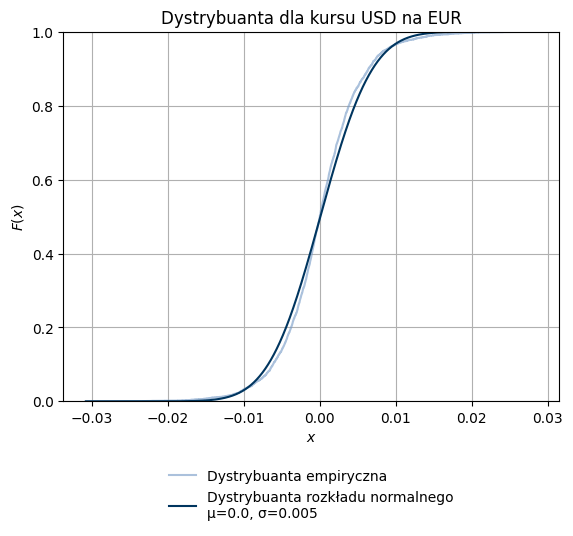

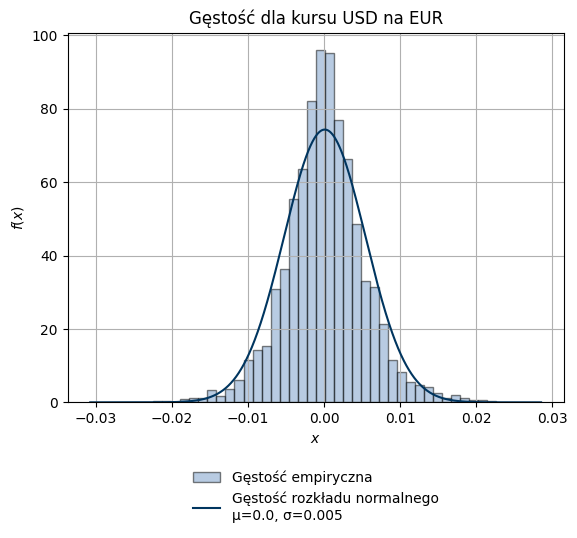

In [273]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dopasowanie rozkładu normalnego do danych
params_eur = stats.norm.fit(eur)  # zwraca (mu, sigma)
norm_eur = stats.norm(*params_eur)

# Generowanie danych teoretycznych
t_eur = np.linspace(np.min(eur), np.max(eur), len(eur))
cdf_eur = norm_eur.cdf(t_eur)
pdf_eur = norm_eur.pdf(t_eur)

# Wykres dystrybuanty (empiryczna vs. normalna)
sns.ecdfplot(data=eur, label="Dystrybuanta empiryczna", color=kolor[1], alpha=0.6)
plt.plot(t_eur, cdf_eur,
         label=f"Dystrybuanta rozkładu normalnego\nμ={round(params_eur[0], 3)}, σ={round(params_eur[1], 3)}",
         color=kolor[0])

plt.title("Dystrybuanta dla kursu USD na EUR")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.grid(True)
plt.show()

# Wykres gęstości (empiryczna vs. normalna)
plt.hist(eur, bins=50, edgecolor='k', density=True,
         label="Gęstość empiryczna", color=kolor[1], alpha=0.5)
plt.plot(t_eur, pdf_eur,
         label=f"Gęstość rozkładu normalnego\nμ={round(params_eur[0], 3)}, σ={round(params_eur[1], 3)}",
         color=kolor[0])

plt.title("Gęstość dla kursu USD na EUR")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.grid(True)
plt.show()


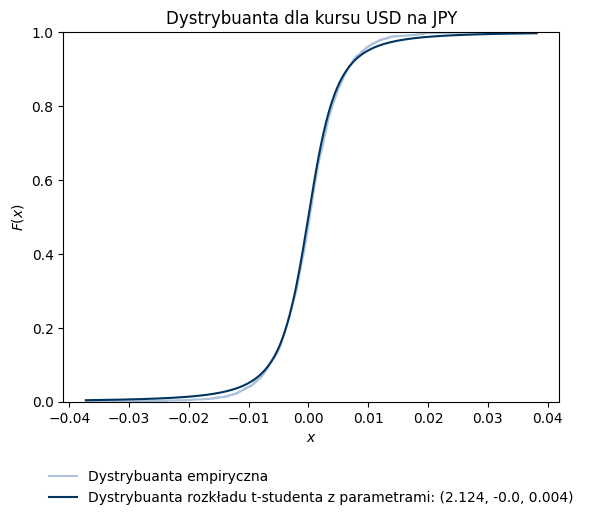

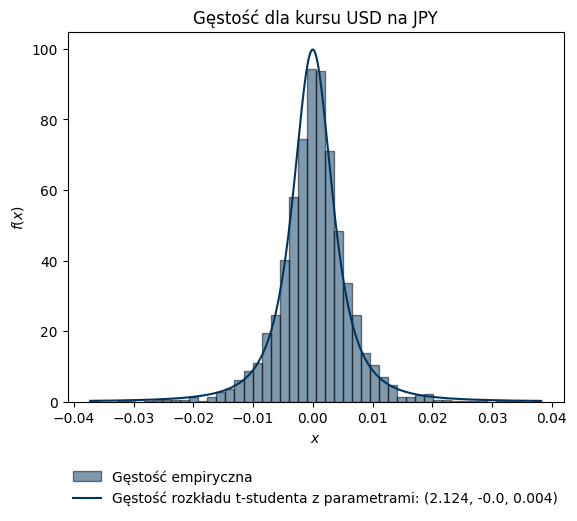

In [180]:
eur = eur
params_eur = stats.t.fit(eur)
jpy = jpy

t_student_jpy = stats.t(*params_jpy)
t_student_eur = stats.t(*params_eur)

jpy_sample = t_student_jpy.rvs(size=len(jpy))
eur_sample = t_student_eur.rvs(size=len(eur))
sns.ecdfplot(data = jpy, label = "Dystrybuanta empiryczna", color = kolor[1], alpha = 0.6)

t_jpy = np.linspace(np.min(jpy), np.max(jpy), len(jpy))
th_F = t_student_jpy.cdf(t_jpy)
plt.plot(t_jpy, th_F, label = f"Dystrybuanta rozkładu t-studenta z parametrami: {(round(params_jpy[0], 3), round(params_jpy[1], 3), round(params_jpy[2], 3))}", color = kolor[0])

plt.title("Dystrybuanta dla kursu USD na JPY")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

plt.hist(jpy, bins = 50, edgecolor='k', density=True, label = "Gęstość empiryczna", color = kolor[0], alpha = 0.5)

f_theo = t_student_jpy.pdf(t_jpy)
plt.plot(t_jpy, f_theo, label = f"Gęstość rozkładu t-studenta z parametrami: {(round(params_jpy[0], 3), round(params_jpy[1], 3), round(params_jpy[2], 3))}", color = kolor[0])
plt.title("Gęstość dla kursu USD na JPY")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

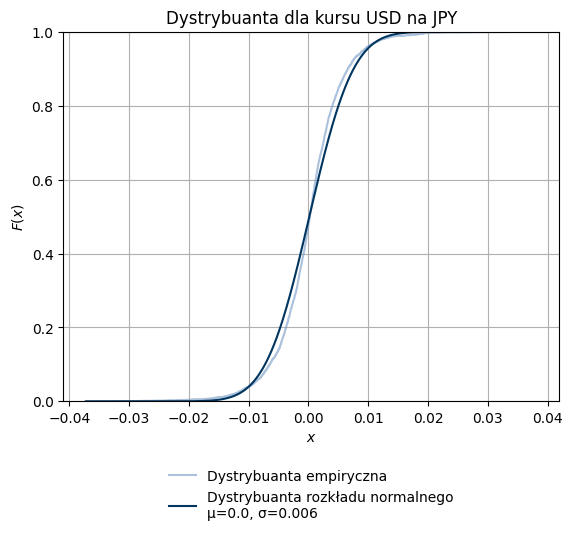

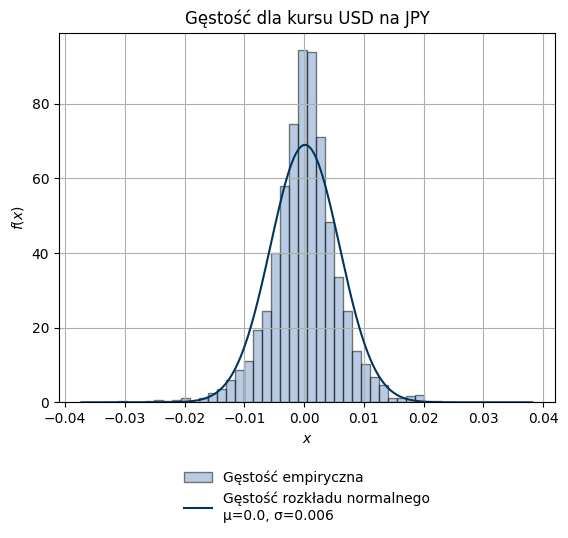

In [275]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dopasowanie rozkładu normalnego do danych jpy
params_jpy = stats.norm.fit(jpy)  # (mu, sigma)
norm_jpy = stats.norm(*params_jpy)

# Generowanie punktów do wykresów
t_jpy = np.linspace(np.min(jpy), np.max(jpy), len(jpy))
cdf_jpy = norm_jpy.cdf(t_jpy)
pdf_jpy = norm_jpy.pdf(t_jpy)

# Wykres dystrybuanty empirycznej i normalnej
sns.ecdfplot(data=jpy, label="Dystrybuanta empiryczna", color=kolor[1], alpha=0.6)
plt.plot(t_jpy, cdf_jpy,
         label=f"Dystrybuanta rozkładu normalnego\nμ={round(params_jpy[0], 3)}, σ={round(params_jpy[1], 3)}",
         color=kolor[0])

plt.title("Dystrybuanta dla kursu USD na JPY")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.grid(True)
plt.show()

# Wykres gęstości empirycznej i teoretycznej
plt.hist(jpy, bins=50, edgecolor='k', density=True,
         label="Gęstość empiryczna", color=kolor[1], alpha=0.5)
plt.plot(t_jpy, pdf_jpy,
         label=f"Gęstość rozkładu normalnego\nμ={round(params_jpy[0], 3)}, σ={round(params_jpy[1], 3)}",
         color=kolor[0])

plt.title("Gęstość dla kursu USD na JPY")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.grid(True)
plt.show()


In [181]:
def semi_standard_deviation(data):
    mean = np.mean(data)  # Średnia
    deviations = data - mean  # Różnice od średniej
    negative_deviations = deviations[deviations < 0]  # Wybór tylko wartości ujemnych od średniej
    semi_std = np.mean(np.abs(negative_deviations))  # Średnia wartość bezwzględnych różnic ujemnych od średniej
    return semi_std
data_jpy= {
    'Nazwa_miary_zmiennosci': ['Odchylenie_standardowe', 'Odchylenie_przecietne', 'Odchylenie_cwiartkowe', 'Semiodchylenie_standardowe', 'Semiodchylenie_przecietne'],
    'JPY_sample': [
        np.std(jpy.squeeze()),
        np.mean(np.abs(jpy_sample - np.mean(jpy_sample))),
        (1/2) * (np.quantile(jpy_sample, 0.75, interpolation="midpoint") - np.quantile(jpy_sample, 0.25, interpolation="midpoint")),
        semi_standard_deviation(jpy_sample),
        np.mean(np.abs(jpy_sample[jpy_sample < np.mean(jpy_sample)] - np.mean(jpy_sample)))
    ],

    'JPY_from_data': [
        np.std(jpy),
        np.mean(np.abs(jpy - np.mean(jpy))),
        (1/2) * (np.quantile(jpy, 0.75, interpolation="midpoint") - np.quantile(jpy, 0.25, interpolation="midpoint")),
        semi_standard_deviation(jpy),
        np.mean(np.abs(jpy[jpy < np.mean(jpy)] - np.mean(jpy)))
    ]
}


dfj = pd.DataFrame(data_jpy)
dfj

,Nazwa_miary_zmiennosci,JPY_sample,JPY_from_data
0,Odchylenie_standardowe,0.005786,0.005786
1,Odchylenie_przecietne,0.004684,0.004130
2,Odchylenie_cwiartkowe,0.002784,0.003036
3,Semiodchylenie_standardowe,0.004675,0.004201
4,Semiodchylenie_przecietne,0.004675,0.004201


In [182]:
data_eur = {
    'Nazwa_miary_zmiennosci': ['Odchylenie_standardowe', 'Odchylenie_przecietne', 'Odchylenie_cwiartkowe', 'Semiodchylenie_standardowe', 'Semiodchylenie_przecietne'],
    'EUR_sample': [
        np.std(eur_sample),
        np.mean(np.abs(eur_sample - np.mean(eur_sample))),
        (1/2) * (np.quantile(eur_sample, 0.75, interpolation="midpoint") - np.quantile(eur_sample, 0.25, interpolation="midpoint")),
        semi_standard_deviation(eur_sample),      
        np.mean(np.abs(eur_sample[eur_sample < np.mean(eur_sample)] - np.mean(eur_sample)))
    ],
    'EUR': [
        np.std(eur),
        np.mean(np.abs(eur - np.mean(eur))),
        (1/2) * (np.quantile(eur, 0.75, interpolation="midpoint") - np.quantile(eur, 0.25, interpolation="midpoint")),
        semi_standard_deviation(eur),   
        np.mean(np.abs(eur[eur < np.mean(eur)] - np.mean(eur)))
    ]
}


dfe = pd.DataFrame(data_eur)
dfe

,Nazwa_miary_zmiennosci,EUR_sample,EUR
0,Odchylenie_standardowe,0.012064,0.005365
1,Odchylenie_przecietne,0.004941,0.003953
2,Odchylenie_cwiartkowe,0.002826,0.002986
3,Semiodchylenie_standardowe,0.004811,0.003895
4,Semiodchylenie_przecietne,0.004811,0.003895


## wielowymiaryowy

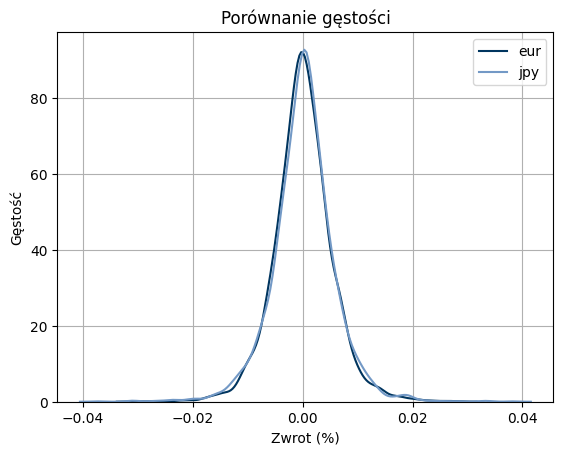

In [272]:
sns.kdeplot(eur, color=kolor[0], label = "eur")
sns.kdeplot(jpy, color=kolor[1], label = "jpy")
plt.title('Porównanie gęstości')
plt.xlabel('Zwrot (%)')
plt.ylabel('Gęstość')
plt.grid(True); plt.legend()
plt.show()

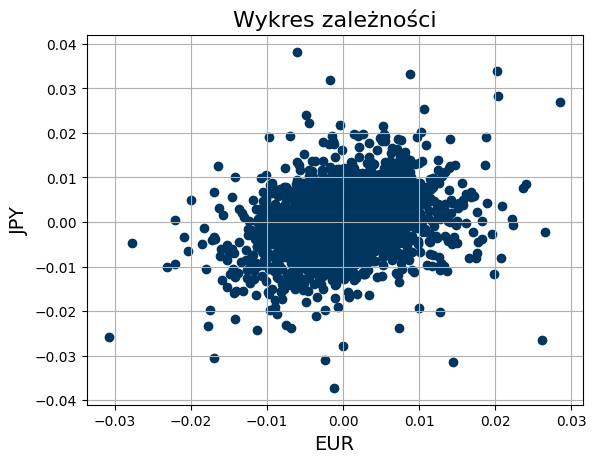

In [106]:
# plt.figure(figsize=(10, 6))
plt.scatter(eur, jpy, color = kolor[0])
plt.title("Wykres zależności", fontsize=16)
plt.xlabel("EUR", fontsize=14)
plt.ylabel("JPY", fontsize=14)
plt.grid(True)
plt.show()

In [163]:
eur = eur.squeeze()
jpy = jpy.squeeze()

eur

Date
2010-04-06    0.006502
2010-04-07    0.004007
2010-04-08   -0.000948
2010-04-09   -0.010355
2010-04-12   -0.006993
                ...   
2024-12-24    0.002619
2024-12-25    0.000312
2024-12-26    0.000291
2024-12-27   -0.002267
2024-12-30   -0.000594
Name: EUR=X, Length: 3839, dtype: float64

In [164]:
returns = pd.concat([eur, jpy], axis=1)
returns.columns = ['EUR_ret', 'JPY_ret']

# Oblicz portfel
returns["Walutowy_portfel"] = 5/8 * returns["EUR_ret"] + 3/8 * returns["JPY_ret"]
returns


,EUR_ret,JPY_ret,Walutowy_portfel
Date,,,
2010-04-06,0.006502,-0.005682,0.001933
2010-04-07,0.004007,-0.005171,0.000565
2010-04-08,-0.000948,0.001190,-0.000146
2010-04-09,-0.010355,-0.002783,-0.007515
2010-04-12,-0.006993,0.000247,-0.004278
...,...,...,...
2024-12-24,0.002619,0.004037,0.003151
2024-12-25,0.000312,-0.000369,0.000057
2024-12-26,0.000291,0.000165,0.000244


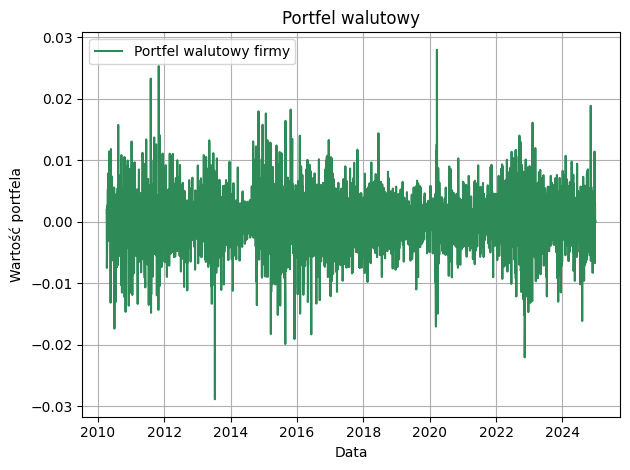

In [166]:
wallet = returns["Walutowy_portfel"]
plt.plot(returns.index, wallet, label="Portfel walutowy firmy", color="seagreen")
plt.title("Portfel walutowy")
plt.xlabel("Data")
plt.ylabel("Wartość portfela")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [167]:
eur_q1 = np.quantile(wallet, 0.25, interpolation="midpoint")
eur_q2 = np.median(wallet)
eur_q3 = np.quantile(wallet, 0.75, interpolation="midpoint")


data_q = {
    'Kwartyl': ['Q1', 'Q2', 'Q3'],
    'wallet': [eur_q1, eur_q2, eur_q3],
}

dfw = pd.DataFrame(data_q)
dfw

,Kwartyl,wallet
0,Q1,-0.002427
1,Q2,0.000156
2,Q3,0.002679


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


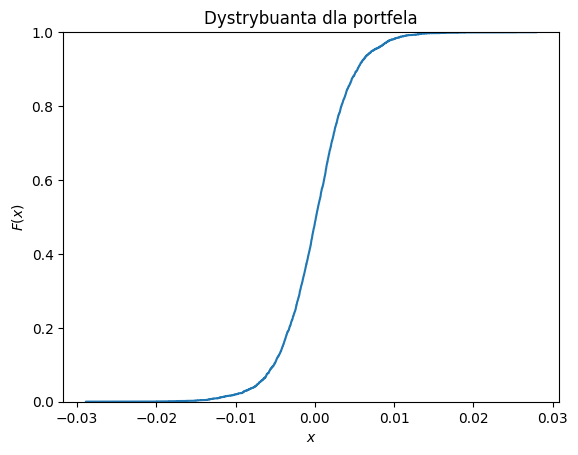

In [168]:
sns.ecdfplot(data = wallet)
# sns.color_palette('flare', as_cmap = True)
plt.title("Dystrybuanta dla portfela")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False)
plt.show()

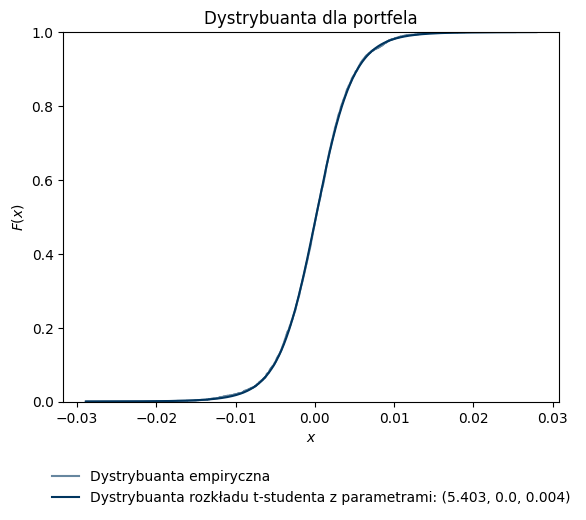

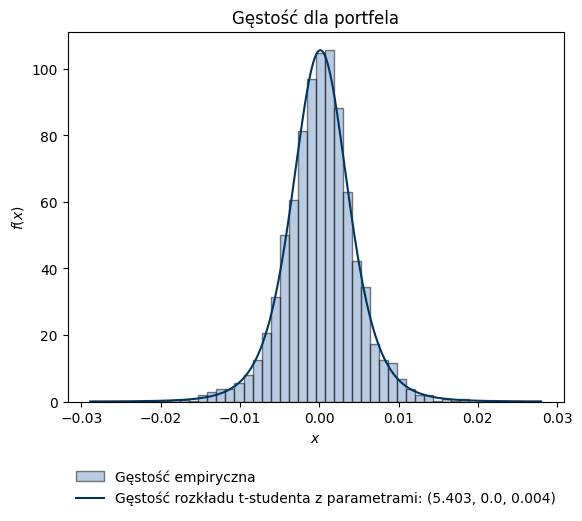

In [183]:

params_wallet = stats.t.fit(wallet)

t_student_wallet = stats.t(*params_wallet)

wallet_sample = t_student_wallet.rvs(size=len(wallet))
sns.ecdfplot(data = wallet, label = "Dystrybuanta empiryczna", color = kolor[0], alpha = 0.6)

t_Currency = np.linspace(np.min(wallet), np.max(wallet), len(wallet))
th_F = t_student_wallet.cdf(t_Currency)
plt.plot(t_Currency, th_F, label = f"Dystrybuanta rozkładu t-studenta z parametrami: {(round(params_wallet[0], 3), round(params_wallet[1], 3), round(params_wallet[2], 3))}",  color = kolor[0])

plt.title("Dystrybuanta dla portfela")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

plt.hist(wallet, bins = 50, edgecolor='k', density=True, label = "Gęstość empiryczna", color = kolor[1], alpha = 0.5)

f_theo = t_student_wallet.pdf(t_Currency)
plt.plot(t_Currency, f_theo, label = f"Gęstość rozkładu t-studenta z parametrami: {(round(params_wallet[0], 3), round(params_wallet[1], 3), round(params_wallet[2], 3))}", color = kolor[0])
plt.title("Gęstość dla portfela")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(frameon=False,  loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.show()

In [184]:
data_wallet = {
    'Nazwa_miary_zmiennosci': ['Odchylenie_standardowe', 'Odchylenie_przecietne', 'Odchylenie_cwiartkowe', 'Semiodchylenie_standardowe', 'Semiodchylenie_przecietne'],
    'wallet_rozklad': [
        np.std(wallet_sample),
        np.mean(np.abs(wallet_sample - np.mean(wallet_sample))),
        (1/2) * (np.quantile(wallet_sample, 0.75, interpolation="midpoint") - np.quantile(wallet_sample, 0.25, interpolation="midpoint")),
        semi_standard_deviation(wallet_sample),      
        np.mean(np.abs(wallet_sample[wallet_sample < np.mean(wallet_sample)] - np.mean(wallet_sample)))
    ],
    'wallet_probka': [
        np.std(wallet),
        np.mean(np.abs(wallet - np.mean(wallet))),
        (1/2) * (np.quantile(wallet, 0.75, interpolation="midpoint") - np.quantile(wallet, 0.25, interpolation="midpoint")),
        semi_standard_deviation(wallet),   
        np.mean(np.abs(wallet[wallet < np.mean(wallet)] - np.mean(wallet)))
    ]
}


dfww = pd.DataFrame(data_wallet)
dfww

,Nazwa_miary_zmiennosci,wallet_rozklad,wallet_probka
0,Odchylenie_standardowe,0.004636,0.004517
1,Odchylenie_przecietne,0.003423,0.003366
2,Odchylenie_cwiartkowe,0.002576,0.002553
3,Semiodchylenie_standardowe,0.003404,0.003402
4,Semiodchylenie_przecietne,0.003404,0.003402


Text(0.5, 0, 'h')

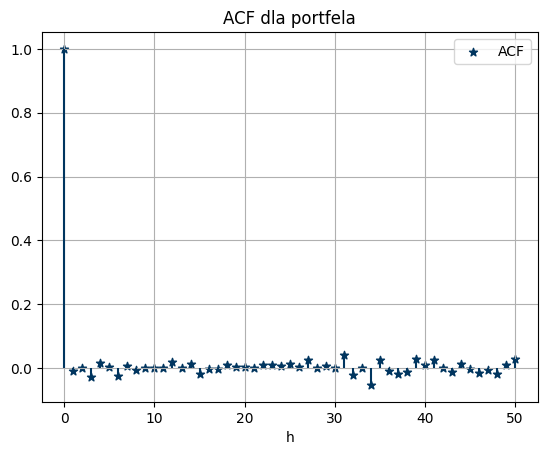

In [175]:
acf_wallet = acf(wallet, nlags=h, fft=False)
plt.vlines(x=np.arange(h+1), ymin=0, ymax=acf_wallet, color = '#00355f')
plt.scatter(np.arange(h+1), acf_wallet, marker = '*', color = '#00355f', label = 'ACF')
plt.title('ACF dla portfela'); plt.legend(); plt.grid()
plt.xlabel('h')

In [176]:
wallet_q1 = np.quantile(wallet, 0.25, interpolation="midpoint")
wallet_q2 = np.median(wallet)
wallet_q3 = np.quantile(wallet, 0.75, interpolation="midpoint")


data_qw = {
    'Kwartyl': ['Q1', 'Q2', 'Q3'],
    'Wallet': [wallet_q1, wallet_q2, wallet_q3],
}

dff = pd.DataFrame(data_qw)
dff

,Kwartyl,Wallet
0,Q1,-0.002427
1,Q2,0.000156
2,Q3,0.002679


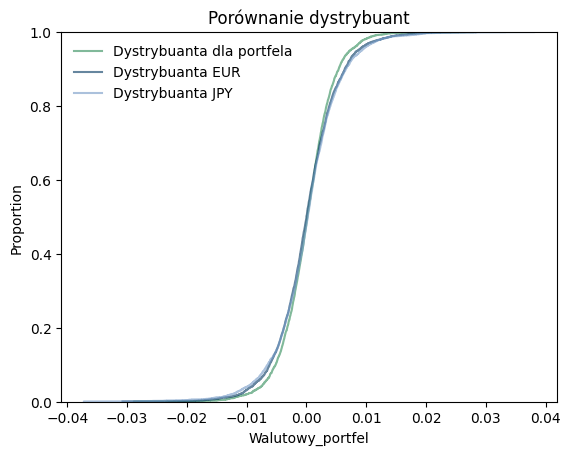

In [188]:
sns.ecdfplot(data = wallet, label = "Dystrybuanta dla portfela", color = 'seagreen', alpha = 0.6)
sns.ecdfplot(data = eur, label = "Dystrybuanta EUR", color = kolor[0], alpha = 0.6)
sns.ecdfplot(data = jpy, label = "Dystrybuanta JPY", color = kolor[1], alpha = 0.6)
plt.legend()
plt.title("Porównanie dystrybuant")
plt.legend(frameon=False)

In [240]:
N = 10*12
n = 30

maksima = []
for i in range(N*n):
    maksima.append(np.max(abs(eur[n*i:n*(i+1)])))
len(maksima), N*n

(3600, 3600)

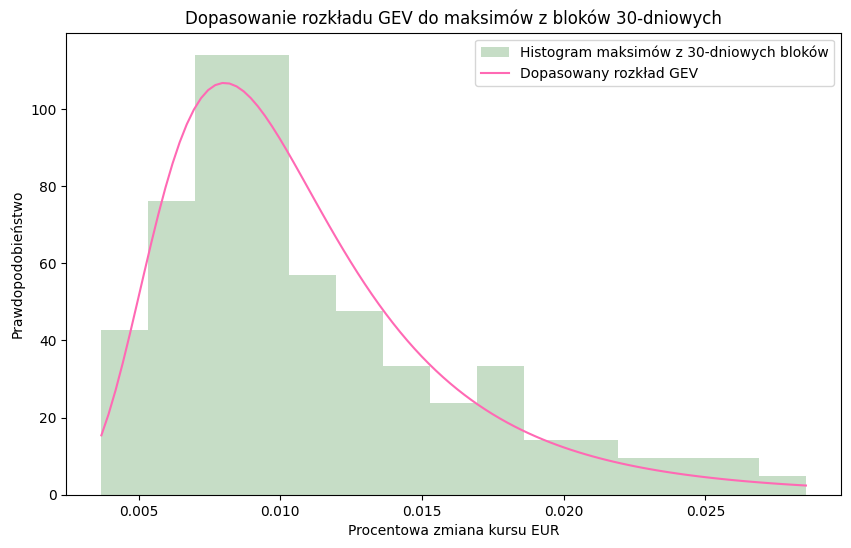

Parametry rozkładu GEV: shape=-0.1486, loc=0.0085, scale=0.0035


In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme

# Zakładamy, że masz Series eur
# Jeśli jest to np. df['eur'], to przekaż: eur = df['eur']

block_size = 30
num_blocks = len(eur) // block_size

# Zbieramy maksima z każdej grupy 30 kolejnych dni
maksima = []
for i in range(num_blocks):
    block = eur.iloc[i*block_size:(i+1)*block_size]
    block_max = block.max()
    if np.isfinite(block_max):  # ignorujemy NaN / inf
        maksima.append(block_max)

maksima = np.array(maksima)

# Dopasowanie rozkładu GEV
shape, loc, scale = genextreme.fit(maksima)

# Wizualizacja
x = np.linspace(min(maksima), max(maksima), 100)
pdf = genextreme.pdf(x, shape, loc, scale)

plt.figure(figsize=(10, 6))
plt.hist(maksima, bins=15, density=True, alpha=0.5, color='darkseagreen', label='Histogram maksimów z 30-dniowych bloków')
plt.plot(x, pdf, label='Dopasowany rozkład GEV', color='hotpink')
plt.xlabel('Procentowa zmiana kursu EUR')
plt.ylabel('Prawdopodobieństwo')
plt.legend()
plt.title('Dopasowanie rozkładu GEV do maksimów z bloków 30-dniowych')
plt.show()

# Parametry
print(f"Parametry rozkładu GEV: shape={shape:.4f}, loc={loc:.4f}, scale={scale:.4f}")


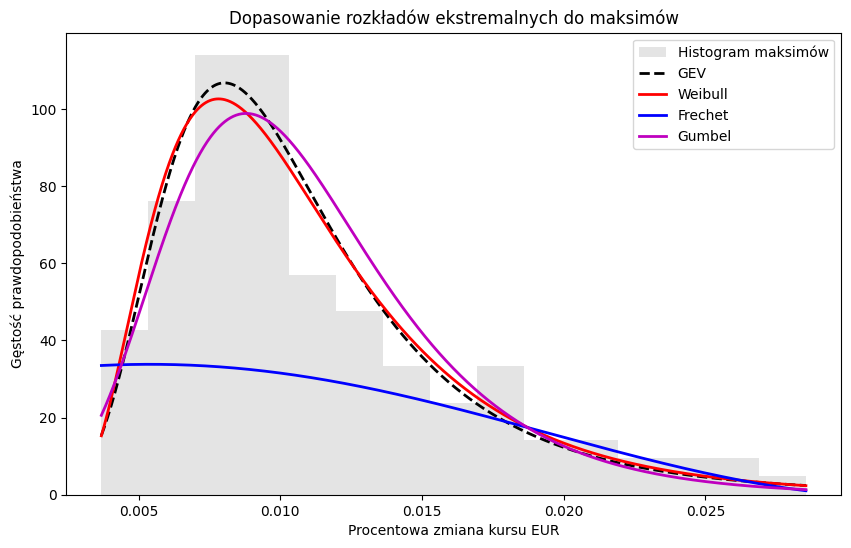

In [266]:
gev_shape, gev_loc, gev_scale = genextreme.fit(maksima)

# Dopasowanie rozkładów
weibull_params = stats.exponweib.fit(maksima)
frechet_params = stats.genextreme.fit(maksima, floc=0)  # Frechet jako przypadek GEV
gumbel_params = stats.gumbel_r.fit(maksima)

# Generowanie danych do wykresów
x = np.linspace(min(maksima), max(maksima), 1000)
gev_pdf = genextreme.pdf(x, gev_shape, gev_loc, gev_scale)
weibull_pdf = stats.exponweib.pdf(x, *weibull_params)
frechet_pdf = stats.genextreme.pdf(x, *frechet_params)
gumbel_pdf = stats.gumbel_r.pdf(x, *gumbel_params)

# Rysowanie histogramu danych i dopasowanych rozkładów
plt.figure(figsize=(10, 6))
plt.hist(maksima, bins=15, density=True, alpha=0.6, color='lightgrey', label='Histogram maksimów')
plt.plot(x, gev_pdf, 'k--', lw=2, label='GEV')
plt.plot(x, weibull_pdf, 'r-', lw=2, label='Weibull')
plt.plot(x, frechet_pdf, 'b-', lw=2, label='Frechet')
plt.plot(x, gumbel_pdf, 'm-', lw=2, label='Gumbel')
# plt.ylim(top=1.8)
plt.xlabel('Procentowa zmiana kursu EUR')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.title('Dopasowanie rozkładów ekstremalnych do maksimów')
plt.legend()

In [267]:
# Dopasowanie rozkładów
weibull_params = stats.exponweib.fit(maksima)
frechet_params = stats.genextreme.fit(maksima, floc=0)  # Frechet jest specjalnym przypadkiem rozkładu uogólnionego ekstremalnego
gumbel_params = stats.gumbel_r.fit(maksima)

# Test K-S dla rozkładu Weibulla
ks_stat_weibull, p_value_weibull = stats.kstest(maksima, 'exponweib', args=weibull_params)

# Test K-S dla rozkładu Frecheta
ks_stat_frechet, p_value_frechet = stats.kstest(maksima, 'genextreme', args=frechet_params)

# Test K-S dla rozkładu Gumbela
ks_stat_gumbel, p_value_gumbel = stats.kstest(maksima, 'gumbel_r', args=gumbel_params)

print(f"Test K-S dla Weibulla: statystyka={ks_stat_weibull}, p-wartość={p_value_weibull}")
print(f"Test K-S dla Frecheta: statystyka={ks_stat_frechet}, p-wartość={p_value_frechet}")
print(f"Test K-S dla Gumbela: statystyka={ks_stat_gumbel}, p-wartość={p_value_gumbel}")

Test K-S dla Weibulla: statystyka=0.04892778870746728, p-wartość=0.9066394949668448
Test K-S dla Frecheta: statystyka=0.48768211133839284, p-wartość=2.3332000130730134e-28
Test K-S dla Gumbela: statystyka=0.07708319740392017, p-wartość=0.4164540521040123


Text(0.5, 1.0, 'Maksima')

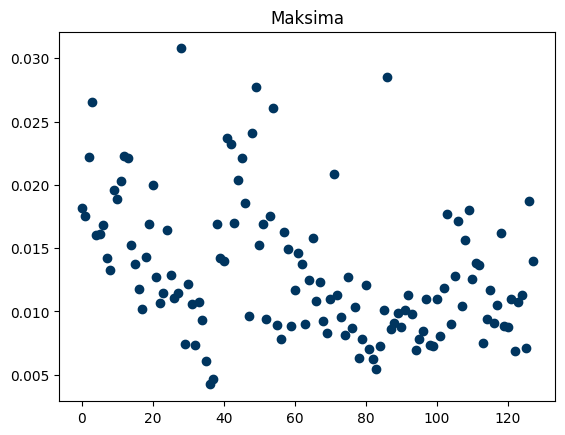

In [242]:
plt.scatter(np.arange(N*n), maksima, color = kolor[0])
plt.title("Maksima")

In [268]:
df_corr = pd.DataFrame({
    'EUR': eur,
    'JPY': jpy
})

# Obliczamy macierz korelacji
correlation_matrix = df_corr.corr()

print(correlation_matrix)

          EUR       JPY
EUR  1.000000  0.305611
JPY  0.305611  1.000000


In [247]:
# Dopasowanie rozkładów
weibull_params = stats.exponweib.fit(maksima)
frechet_params = stats.genextreme.fit(maksima, floc=0)  # Frechet jest specjalnym przypadkiem rozkładu uogólnionego ekstremalnego
gumbel_params = stats.gumbel_r.fit(maksima)

# Generowanie danych na podstawie dopasowanych rozkładów
x = np.linspace(min(maksima), max(maksima), 1000)
weibull_pdf = stats.exponweib.pdf(x, *weibull_params)
frechet_pdf = stats.genextreme.pdf(x, *frechet_params)
gumbel_pdf = stats.gumbel_r.pdf(x, *gumbel_params)

# Rysowanie histogramu danych i dopasowanych rozkładów
plt.hist(maksima, bins=15, density = True, alpha=0.6)
plt.plot(x, weibull_pdf, 'r-', lw=2, label='Weibull')
plt.ylim(top = 1.8)
plt.plot(x, frechet_pdf, 'b-', lw=2, label='Frechet')
plt.plot(x, gumbel_pdf, 'm-', lw=2, label='Gumbel')
plt.legend()
plt.show()

ValueError: The data contains non-finite values.

Ta funkcja u mnie nie działa ale Karol z niej pobrał dane:

In [ ]:
# Input ticker symbol
ticker = input("Enter Stock Name: ")

# Download stock data
data = "GS_stock_data.csv"

# Ensure there is data to process
if data.empty:
    print("No data found for the given stock.")
else:
    # Reset the index to make 'Date' a column and save the data to CSV
    data.reset_index(inplace=True)
    data.columns = data.columns.droplevel('Ticker')
    # Save the data to a CSV file with 'Date' as the first column, followed by 'Open', 'High', 'Low', 'Close'
    data[['Date', 'Open', 'High', 'Low', 'Close']].to_csv(f"{ticker}_stock_data.csv")

    print(f"Stock data saved as {ticker}_stock_data.csv")

    # Extract closing prices for plotting
    closing_prices = data['Close'].values
    dates = data['Date']

    # Plot the trajectory of the stock price
    plt.figure(figsize=(15, 7))
    plt.plot(dates, closing_prices, label="Trajectory of Stock Price")
    plt.title(f"{ticker} Stock Price as a Trajectory")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.show()